In [1]:
# import required packages
# for pandas
import pandas as pd
# for heatmap drawing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# for train & test set split
# for multiple regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# read Data
dataFrame = pd.read_csv("./kc_house_data.csv")
dataFrame.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [3]:
dataFrame.shape

(21613, 21)

In [4]:
dataFrame.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
# >>>>>>>>> preprocessing start
dataFrame = dataFrame.dropna()
dataFrame.shape # no na rows!

(21613, 21)

In [6]:
# Remove house data that was renovated, waterfront and has a view => kind of outlier...
renov_idx = dataFrame[(dataFrame['yr_renovated'] > 0) | (dataFrame['waterfront'] > 0) | (dataFrame['view'] > 0)].index
renov_idx

Int64Index([    1,    15,    21,    35,    49,    58,    60,    95,    99,
              103,
            ...
            21505, 21521, 21529, 21539, 21540, 21554, 21576, 21579, 21593,
            21598],
           dtype='int64', length=2825)

In [7]:
dataFrame = dataFrame.drop(renov_idx)
dataFrame.shape

(18788, 21)

In [8]:
# drop unimportant variables...
# id, date,zipcode
# waterfront, view, yr_renovated => already proprocessed!!
dataFrame.drop(['id', 'date', 'zipcode', 'waterfront', 'view', 'yr_renovated'], axis='columns', inplace=True)
dataFrame.shape
# <<<<<<<<<< preprocessing finished...

(18788, 15)

In [9]:
# Let's check correlation...
# It's just trial EDA...
# I did it as simple as possible...

In [10]:
# all data is continuous...
dataFrame.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.317731   0.498404     0.677333  0.113201  0.281467   
bedrooms       0.317731  1.000000   0.500438     0.587424  0.036169  0.171701   
bathrooms      0.498404  0.500438   1.000000     0.737583  0.086584  0.518484   
sqft_living    0.677333  0.587424   0.737583     1.000000  0.190026  0.364497   
sqft_lot       0.113201  0.036169   0.086584     0.190026  1.000000 -0.007778   
floors         0.281467  0.171701   0.518484     0.364497 -0.007778  1.000000   
condition      0.026753  0.032357  -0.142970    -0.075630 -0.014542 -0.283038   
grade          0.663659  0.346345   0.648779     0.744990  0.127412  0.475289   
sqft_above     0.610903  0.479730   0.670995     0.882883  0.190786  0.523893   
sqft_basement  0.202583  0.276091   0.209075     0.337261  0.017949 -0.282196   
yr_built       0.104430  0.166720   0.575592     0.370081  0.056300  0.538449   
lat            0.363349 -0.020514   0.008747     0.040433 -0.055038  0.042655   
long           0.083696  0.146096   0.266750     0.301095  0.225379  0.139289   
sqft_living15  0.573326  0.395944   0.564149     0.763165  0.161654  0.303643   
sqft_lot15     0.100492  0.036380   0.081222     0.194592  0.698995 -0.014587   

               condition     grade  sqft_above  sqft_basement  yr_built  \
price           0.026753  0.663659    0.610903       0.202583  0.104430   
bedrooms        0.032357  0.346345    0.479730       0.276091  0.166720   
bathrooms      -0.142970  0.648779    0.670995       0.209075  0.575592   
sqft_living    -0.075630  0.744990    0.882883       0.337261  0.370081   
sqft_lot       -0.014542  0.127412    0.190786       0.017949  0.056300   
floors         -0.283038  0.475289    0.523893      -0.282196  0.538449   
condition       1.000000 -0.166458   -0.173334       0.188122 -0.389106   
grade          -0.166458  1.000000    0.751715       0.062859  0.498180   
sqft_above     -0.173334  0.751715    1.000000      -0.144318  0.461941   
sqft_basement   0.188122  0.062859   -0.144318       1.000000 -0.146233   
yr_built       -0.389106  0.498180    0.461941      -0.146233  1.000000   
lat            -0.008444  0.106365   -0.012068       0.109393 -0.149369   
long           -0.109911  0.243160    0.385061      -0.137475  0.407033   
sqft_living15  -0.124737  0.703284    0.755446       0.093678  0.369482   
sqft_lot15     -0.003868  0.128940    0.196028       0.017062  0.071064   

                    lat      long  sqft_living15  sqft_lot15  
price          0.363349  0.083696       0.573326    0.100492  
bedrooms      -0.020514  0.146096       0.395944    0.036380  
bathrooms      0.008747  0.266750       0.564149    0.081222  
sqft_living    0.040433  0.301095       0.763165    0.194592  
sqft_lot      -0.055038  0.225379       0.161654    0.698995  
floors         0.042655  0.139289       0.303643   -0.014587  
condition     -0.008444 -0.109911      -0.124737   -0.003868  
grade          0.106365  0.243160       0.703284    0.128940  
sqft_above    -0.012068  0.385061       0.755446    0.196028  
sqft_basement  0.109393 -0.137475       0.093678    0.017062  
yr_built      -0.149369  0.407033       0.369482    0.071064  
lat            1.000000 -0.123185       0.036251   -0.058285  
long          -0.123185  1.000000       0.391205    0.251654  
sqft_living15  0.036251  0.391205       1.000000    0.203257  
sqft_lot15    -0.058285  0.251654       0.203257    1.000000

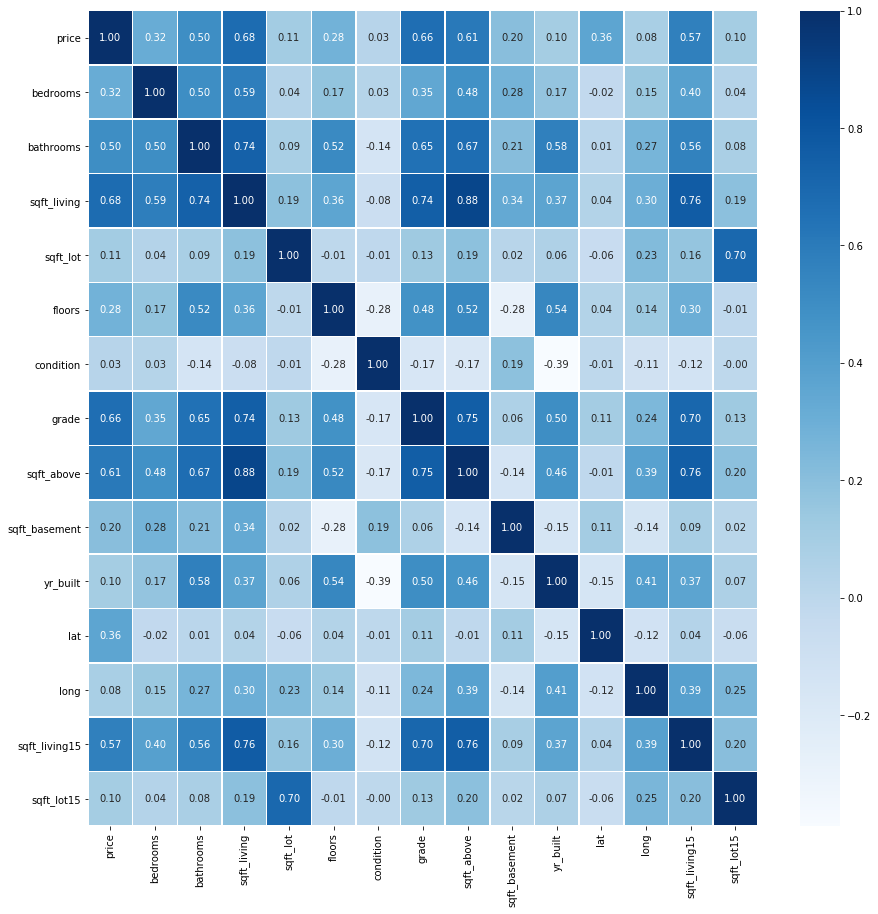

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(data=dataFrame.corr(), annot=True, fmt='.2f', linewidth=.5, cmap='Blues')

In [12]:
# pick major corr features (corr >= 0.2) ... not good feature engineering but for ease...
# bedrooms, bathrooms, sqft_living, floors, grade, sqft_above, sqft_basement, lat, sqft_living15 (9 features)

x = dataFrame[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']]
y = dataFrame[['price']]

In [13]:
x.head()

bedrooms  bathrooms  sqft_living  floors  grade  sqft_above  sqft_basement  \
0         3        1.0         1180     1.0      7        1180              0   
2         2        1.0          770     1.0      6         770              0   
3         4        3.0         1960     1.0      7        1050            910   
4         3        2.0         1680     1.0      8        1680              0   
5         4        4.5         5420     1.0     11        3890           1530   

       lat  sqft_living15  
0  47.5112           1340  
2  47.7379           2720  
3  47.5208           1360  
4  47.6168           1800  
5  47.6561           4760

In [14]:
y.head()

price
0   221900.0
2   180000.0
3   604000.0
4   510000.0
5  1230000.0

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2)

In [16]:
mlm = LinearRegression()
mlm.fit(x_train, y_train)
mlm.coef_

array([[-1.84039101e+04, -9.48754357e+03,  1.07863040e+02,
        -2.26322242e+04,  7.68241527e+04,  5.66093360e+01,
         5.12537041e+01,  6.19505390e+05,  1.11057352e+01]])

In [17]:
y_pred = mlm.predict(x_test)

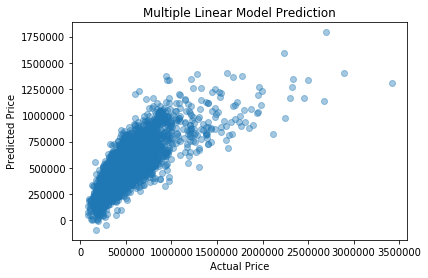

In [18]:
plt.scatter(y_test, y_pred, alpha=.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multiple Linear Model Prediction")
plt.show()
# shows kind of quadratic form... but ignored for ease...

In [19]:
# R^2
mlm.score(x_train, y_train)

0.6136456396746421